In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading in datasets
data = pd.read_csv('/content/drive/MyDrive/Dataset of DAFE project/2015_16_Statewise_Elementary.csv')
meta_data = pd.read_csv('/content/drive/MyDrive/Dataset of DAFE project/2015_16_Statewise_Elementary_Metadata.csv')

In [5]:
def sort_vals(df,col):
    df_new = df.sort_values(by = col)
    df_new.reset_index().drop('index', axis = 1, inplace = True)
    return df_new

In [6]:
def plot_barh(df, col1, col2, size = (10,10), title = None, xlabel = None):
    fig, ax = plt.subplots(1,1,figsize = size)
    plt.barh(df[col1],df[col2],label = col2)

    if title:
        ax.set_title(title)
    else:
        ax.set_title('{} vs {}'.format(col2, col1))
    if xlabel:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(col2)

In [7]:
def display_desc(row):
    return meta_data[meta_data['Field name'] == row].Description.values[0]

In [8]:
print(data.shape)
print(meta_data.shape)

(36, 816)
(816, 2)


In [9]:
print(data.isnull().sum()[data.isnull().sum() > 0].shape)

(0,)


In [10]:
data.head(2)

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,...,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,...,652,36054,3053,38307,6930,6909,6498,5445,6151,2717


In [11]:
meta_data.head(2)

,Field name,Description
0,AC_YEAR,AC_YEAR: AC_YEAR
1,STATCD,Data Reported from: Data Reported from


In [12]:
data['OVERALL_LI'].describe()

count    36.000000
mean     78.309444
std       8.257752
min      63.820000
25%      70.937500
50%      78.480000
75%      86.287500
max      93.910000
Name: OVERALL_LI, dtype: float64

In [13]:
data.AREA_SQKM.describe()

count        36.000000
mean      94501.111111
std      102321.909726
min          32.000000
25%        9926.750000
50%       54578.000000
75%      140320.000000
max      342239.000000
Name: AREA_SQKM, dtype: float64

In [14]:
data.GROWTHRATE.describe()

count    36.000000
mean     19.990556
std      11.455856
min      -0.470000
25%      13.880000
50%      18.910000
75%      22.637500
max      55.500000
Name: GROWTHRATE, dtype: float64

In [15]:
data[data.GROWTHRATE == -0.47]

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
12,2015-16,13,NAGALAND,11,47,1478,125,1981,17.31,14.44,...,233,21056,1454,6588,6152,1772,167,256,3639,781


In [16]:
(data.MALE_LIT - data.FEMALE_LIT).describe()

count    36.000000
mean     13.893611
std       5.679685
min       3.390000
25%      10.130000
50%      13.720000
75%      18.182500
max      27.850000
dtype: float64

In [17]:
# 'OVERALL_LI' is the overall literacy rate for each state
data = sort_vals(data, 'OVERALL_LI')

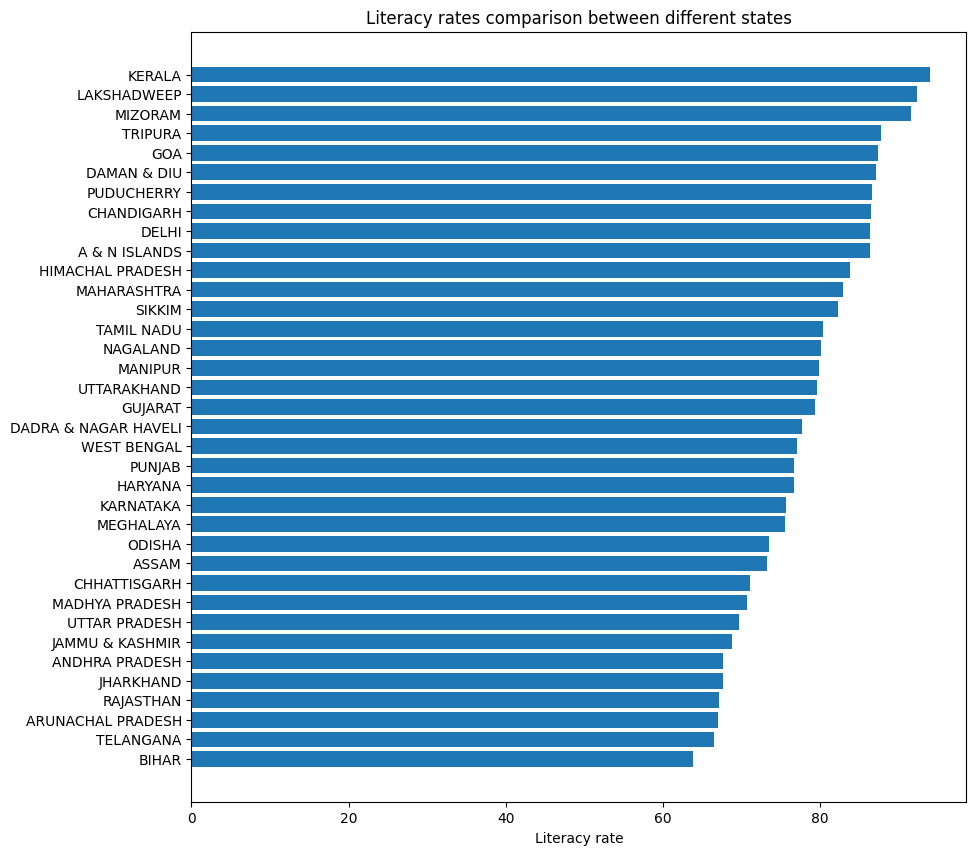

In [18]:
plot_barh(data, 'STATNAME', 'OVERALL_LI', title = 'Literacy rates comparison between different states' , xlabel = 'Literacy rate')

In [19]:
data = sort_vals(data, 'FEMALE_LIT')

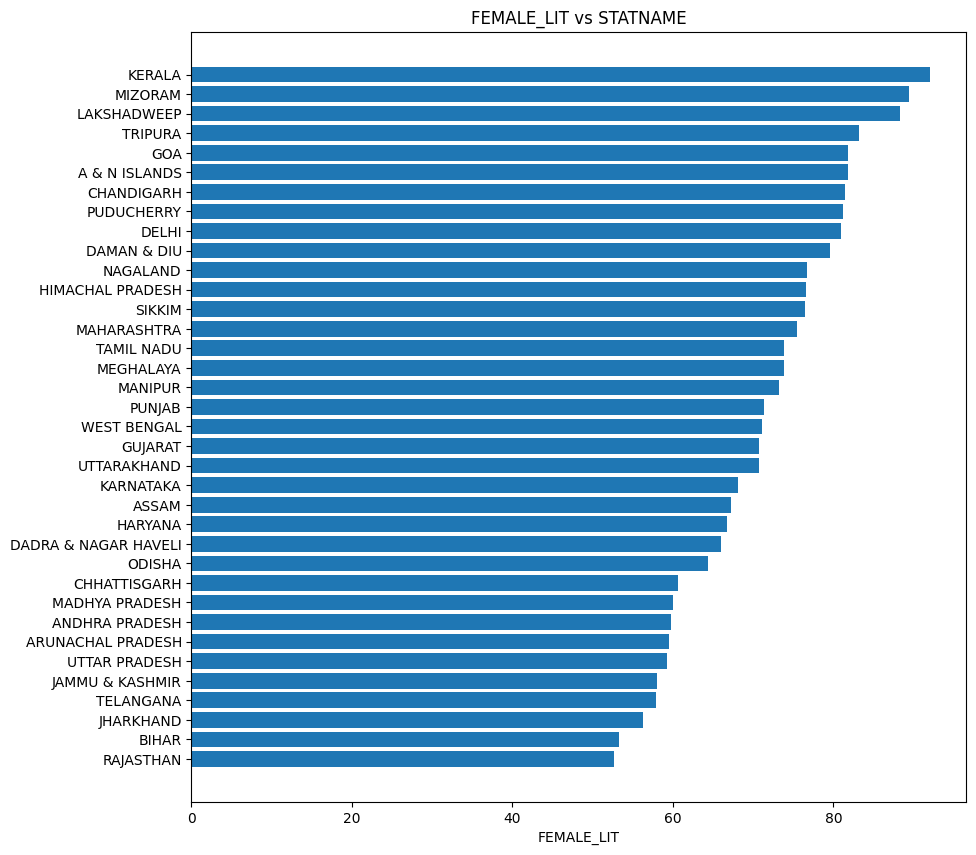

In [20]:
plot_barh(data, 'STATNAME', 'FEMALE_LIT')

In [21]:
data = sort_vals(data, 'MALE_LIT')

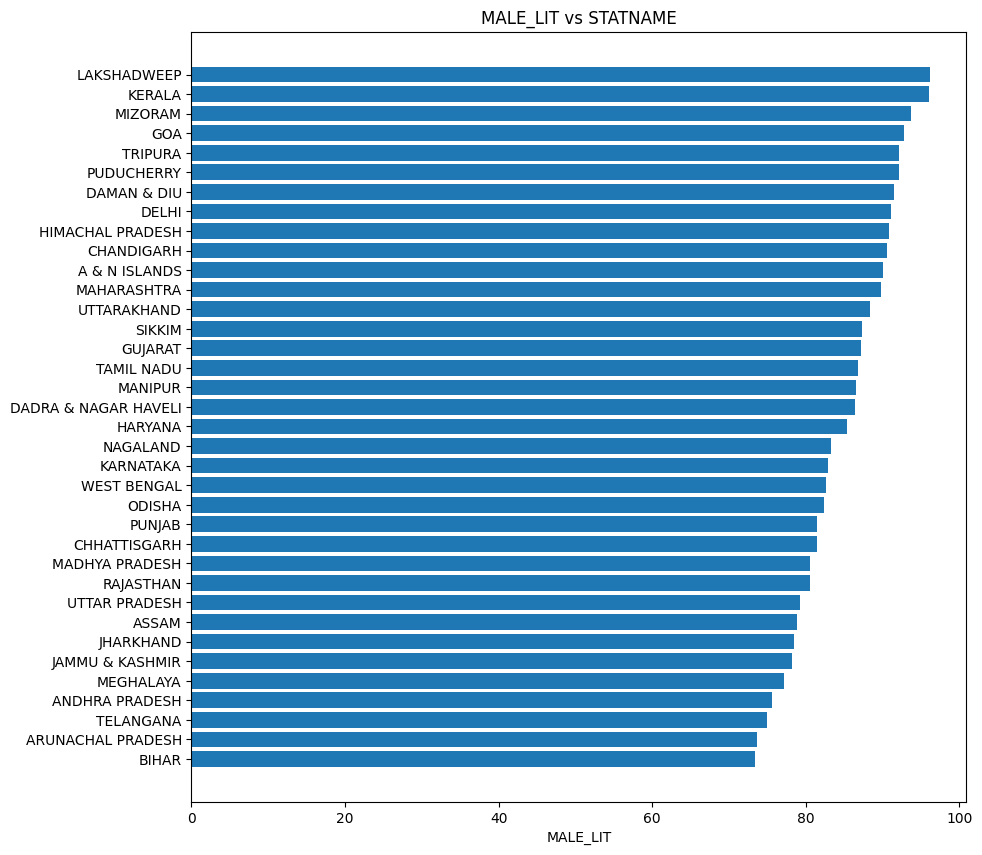

In [22]:
plot_barh(data, 'STATNAME', 'MALE_LIT')

In [23]:
data = sort_vals(data, 'OVERALL_LI')

<Axes: xlabel='STATNAME'>

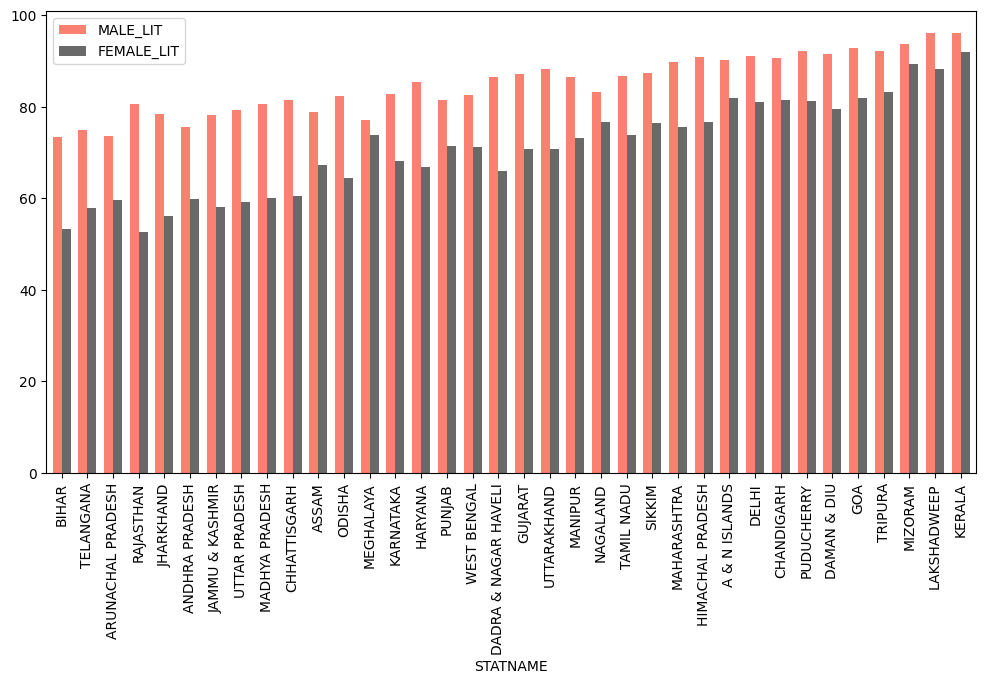

In [24]:
data.plot(kind = 'bar',x = 'STATNAME',y = ['MALE_LIT','FEMALE_LIT'],stacked = False,figsize=(12,6),width = 0.7,color = ['salmon','dimgrey'])

In [25]:
data['DIFF_LIT'] = data.MALE_LIT - data.FEMALE_LIT

In [26]:
diff_lit_mean = data.DIFF_LIT.mean()
print("India's avg difference in literacy rate between men and women is : {}".format(diff_lit_mean))

India's avg difference in literacy rate between men and women is : 13.893611111111113


In [27]:
sort_vals(data, 'DIFF_LIT').head()[['STATNAME','DIFF_LIT']]

,STATNAME,DIFF_LIT
16,MEGHALAYA,3.39
31,KERALA,4.04
14,MIZORAM,4.32
12,NAGALAND,6.60
30,LAKSHADWEEP,7.86


In [28]:
sort_vals(data, 'DIFF_LIT').tail()[['STATNAME','DIFF_LIT']]

,STATNAME,DIFF_LIT
22,MADHYA PRADESH,20.51
25,DADRA & NAGAR HAVELI,20.53
21,CHHATTISGARH,20.86
19,JHARKHAND,22.24
7,RAJASTHAN,27.85


In [29]:
north_east = ['NAGALAND','MANIPUR','MIZORAM','ASSAM','TRIPURA','ARUNACHAL PRADESH','MEGHALAYA','SIKKIM']
data.set_index(data.STATNAME,inplace = True)
ne_diff_lit_mean = data.loc[north_east,'DIFF_LIT' ].mean()
print('The avg in DIFF_LIT for north-eastern states ({}) is much less than the national avg ({}).'.format(ne_diff_lit_mean,diff_lit_mean))

The avg in DIFF_LIT for north-eastern states (9.1475) is much less than the national avg (13.893611111111113).


In [30]:
print("The Female literacy rate for meghalaya : {} .VS. the avg female literacy rate : {}".format(data.loc['MEGHALAYA','FEMALE_LIT'],data.FEMALE_LIT.mean()))

The Female literacy rate for meghalaya : 73.78 .VS. the avg female literacy rate : 71.0913888888889


In [31]:
# We will drop Telangana from bottom 3 as its been recently founded(2014)
top_3_elem = data.sort_values(by = 'OVERALL_LI', ascending = False).head(3)
bottom_3_elem = data.sort_values(by = 'OVERALL_LI', ascending = True).head(4).drop('TELANGANA',axis = 0)

In [32]:
top_bottom = pd.concat([top_3_elem, bottom_3_elem], axis = 0, sort = False)

In [33]:
top_bottom

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G,DIFF_LIT
STATNAME,,,,,,,,,,,,,,,,,,,,,
KERALA,2015-16,32,KERALA,14,166,1907,1375,33388,24.76,9.95,...,3561,675,51419,43025,31335,5327,15449,17752,3936,4.04
LAKSHADWEEP,2015-16,31,LAKSHADWEEP,1,3,10,9,64,41.86,11.00,...,2395,209,139,150,49,15,28,11,0,7.86
MIZORAM,2015-16,15,MIZORAM,8,36,851,169,1091,40.42,15.17,...,4917,1386,6593,3267,0,4575,0,0,0,4.32
BIHAR,2015-16,10,BIHAR,38,537,40779,5633,103805,8.36,17.90,...,49110,3614,147323,272919,11332,2481,475,23095,927,20.06
ARUNACHAL PRADESH,2015-16,12,ARUNACHAL PRADESH,20,99,2982,234,1383,16.48,14.66,...,5497,504,8564,9020,820,202,304,2022,206,14.12
RAJASTHAN,2015-16,8,RAJASTHAN,33,302,41441,10594,68621,19.26,15.31,...,40162,2701,125798,253514,120330,979,5189,86126,1720,27.85


In [34]:
display_desc('TOTPOPULAT')

"Basic data from Census 2011: Total Population(in 1000's)"

In [35]:
top_bottom.TOTPOPULAT/top_bottom.AREA_SQKM * 1000

STATNAME
KERALA                859.120500
LAKSHADWEEP          2000.000000
MIZORAM                51.752763
BIHAR                1102.396907
ARUNACHAL PRADESH      16.514813
RAJASTHAN             200.506079
dtype: float64

In [36]:
top_bottom.DIFF_LIT

STATNAME
KERALA                4.04
LAKSHADWEEP           7.86
MIZORAM               4.32
BIHAR                20.06
ARUNACHAL PRADESH    14.12
RAJASTHAN            27.85
Name: DIFF_LIT, dtype: float64

Text(0.5, 1.0, 'Top 3 vs Bottom 3 states for DIFF_LIT')

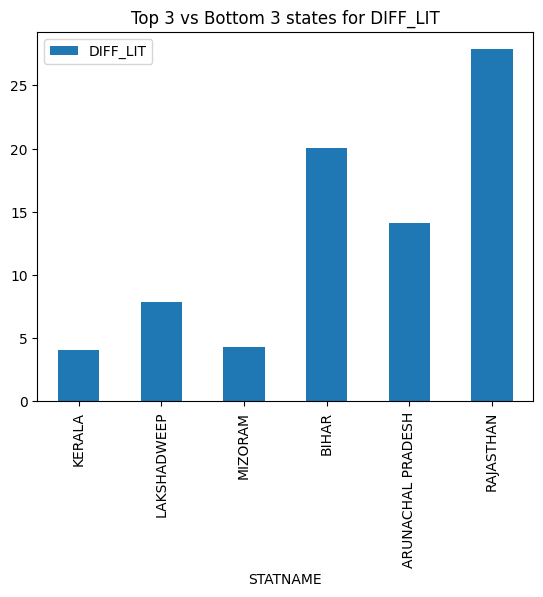

In [37]:
top_bottom.plot(y = 'DIFF_LIT',kind= 'bar')
plt.title('Top 3 vs Bottom 3 states for DIFF_LIT')

In [38]:
display_desc('P_URB_POP')

'Basic data from Census 2011: Percentage Urban Population'

In [39]:
top_bottom['P_RUR_POP'] = 100 - top_bottom['P_URB_POP']

<Axes: xlabel='STATNAME'>

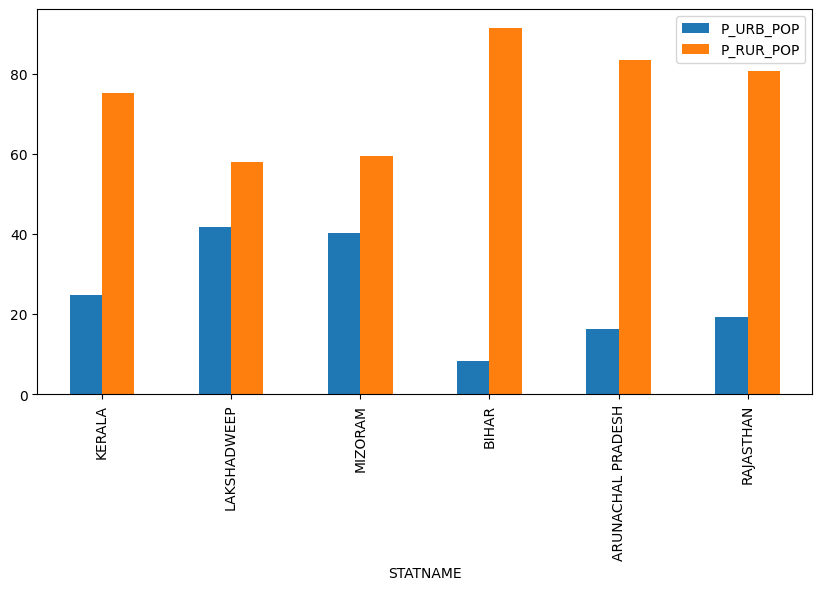

In [40]:
top_bottom.plot(y = ['P_URB_POP', 'P_RUR_POP'], kind = 'bar', figsize = (10,5))

In [41]:
# Approximate National average
data.SEXRATIO.mean()

930.8888888888889

In [42]:
top_bottom.SEXRATIO

STATNAME
KERALA               1084
LAKSHADWEEP           946
MIZORAM               975
BIHAR                 916
ARUNACHAL PRADESH     920
RAJASTHAN             926
Name: SEXRATIO, dtype: int64

<Axes: xlabel='STATNAME'>

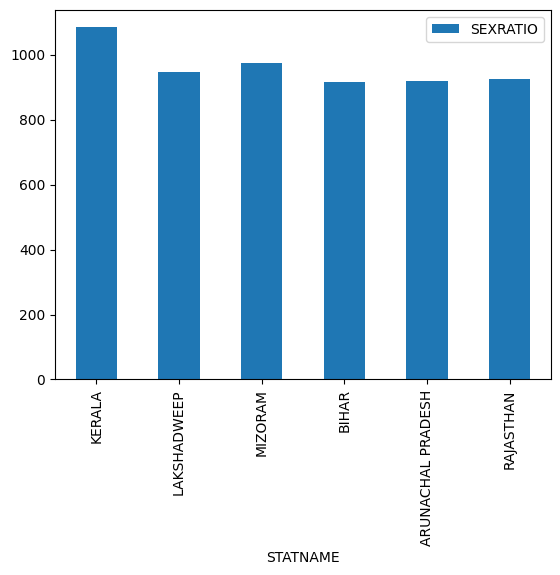

In [43]:
top_bottom.plot(y ='SEXRATIO', kind = 'bar')

<Axes: xlabel='STATNAME'>

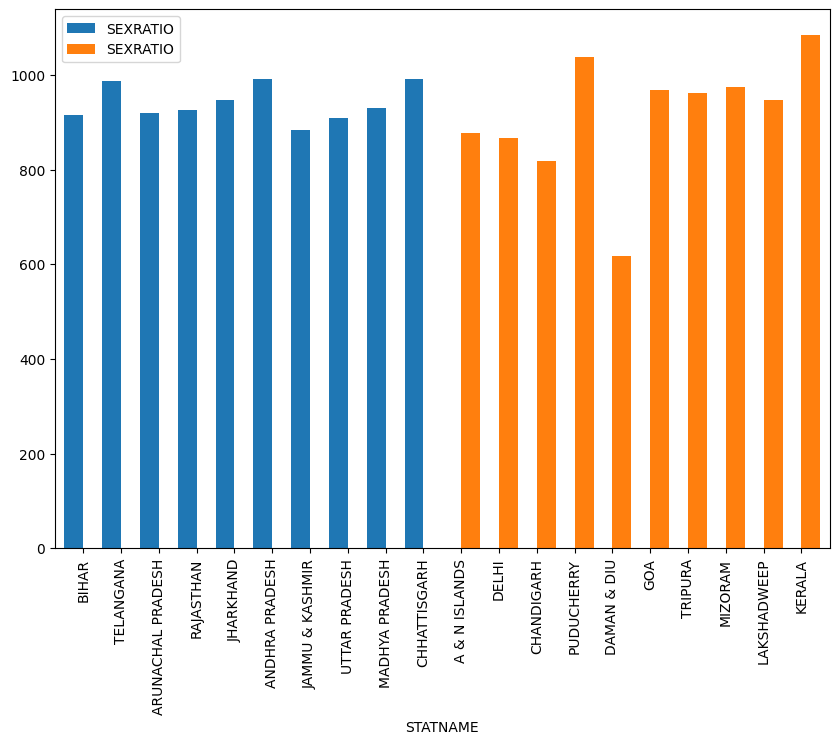

In [44]:
data.sort_values(by = 'OVERALL_LI', inplace=True)
pd.concat([data.head(10),data.tail(10)], axis = 1, sort = False).plot(kind= 'bar', y = 'SEXRATIO', figsize = (10,7),width = 1)

In [45]:
data.loc[:,['SEXRATIO','OVERALL_LI']].corr()

,SEXRATIO,OVERALL_LI
SEXRATIO,1.000000,-0.037555
OVERALL_LI,-0.037555,1.000000


In [46]:
print(display_desc('P_SC_POP'))
print(display_desc('P_ST_POP'))

Basic data from Census 2011: Percentage SC Population
Basic data from Census 2011: Percentage ST Population


In [47]:
top_bottom['SC_ST_POP'] = top_bottom.P_SC_POP + top_bottom.P_ST_POP

<Axes: xlabel='STATNAME'>

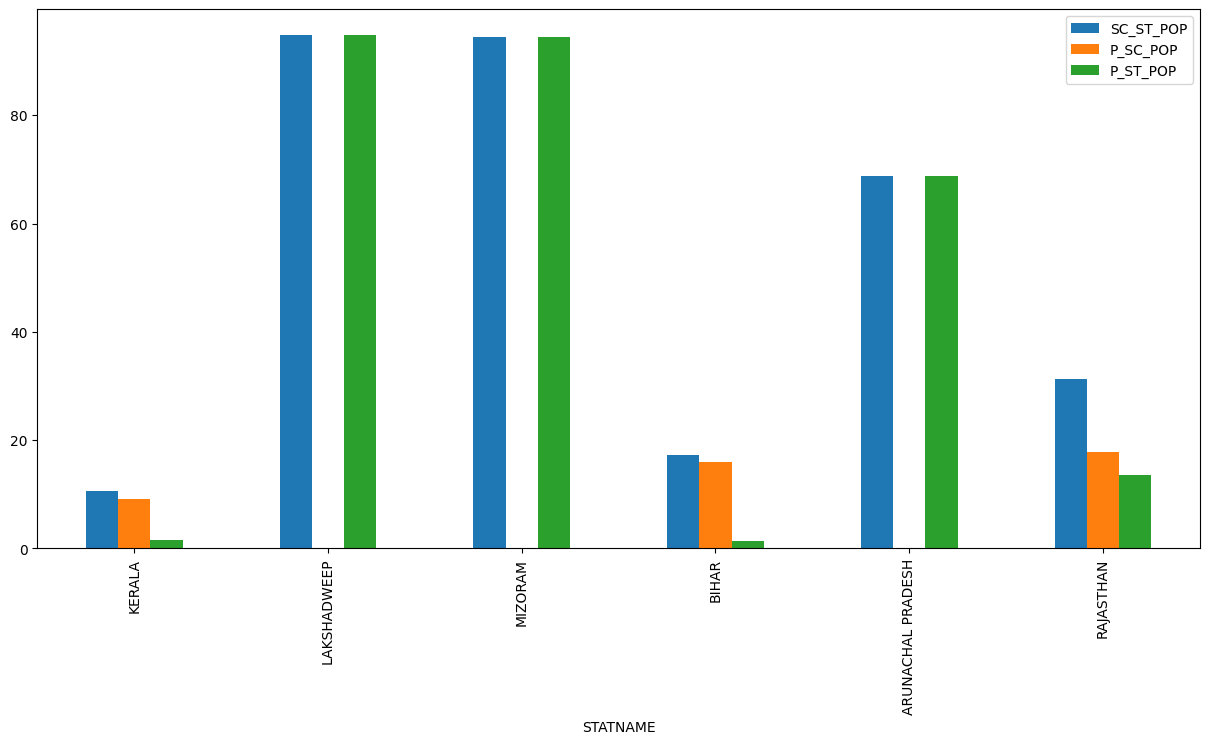

In [48]:
top_bottom.plot(y = ['SC_ST_POP','P_SC_POP','P_ST_POP'], kind = 'bar', figsize = (15,7))

In [49]:
meta_sch = meta_data[meta_data['Field name'].str.contains(r'^SCH\w*TOT')]
print(meta_sch)

    Field name                                        Description
28      SCHTOT                         Schools By Category: Total
37     SCHTOTG             Schools by Category: Government: Total
46     SCHTOTP               Schools by Category: Private : Total
55     SCHTOTM  Schools by Category: Madarsas & Unrecognised: ...
64    SCHTOTGR      Government Schools by Category - Rural: Total
73    SCHTOTGA    Schools by Category: Government & Aided : Total
82    SCHTOTPR         Private Schools by Category - Rural: Total
91   SCHBOYTOT              Schools by Category: Boys Only: Total
100  SCHGIRTOT             Schools by Category: Girls Only: Total


In [50]:
display_desc('SCHTOT')

'Schools By Category: Total'

In [51]:
display_desc('TOT_6_10_15')

'Projected Population : Age Group 6 to 10'

In [52]:
display_desc('TOT_11_13_15')

'Projected Population : Age Group 11 to 13'

In [53]:
top_bottom.SCHTOT

STATNAME
KERALA                16458
LAKSHADWEEP              41
MIZORAM                3072
BIHAR                 80166
ARUNACHAL PRADESH      4012
RAJASTHAN            107931
Name: SCHTOT, dtype: int64

In [54]:
top_bottom['SCHKIDS'] = top_bottom.TOT_6_10_15 + top_bottom.TOT_11_13_15
top_bottom['KIDSPERSCH'] = top_bottom.SCHKIDS/top_bottom.SCHTOT

<Axes: xlabel='STATNAME'>

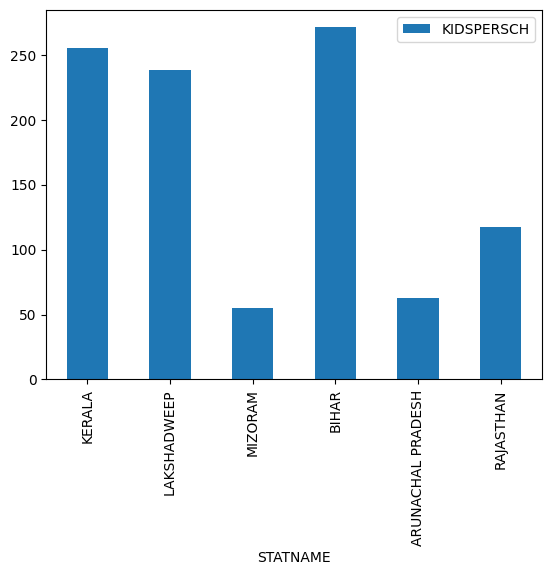

In [55]:
top_bottom.plot(y = 'KIDSPERSCH', kind = 'bar',)

In [56]:
display_desc('TOTCLS1G')

'Total Classrooms: Primary Only - Primary Only'

<Axes: xlabel='STATNAME'>

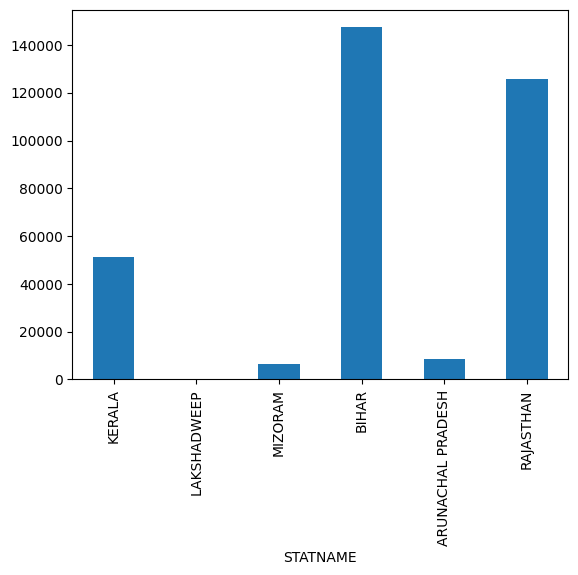

In [57]:
top_bottom['TOTCLS1G'].plot(kind= 'bar')

In [58]:
# primary kids per class
top_bottom['KIDSPERCL'] = top_bottom['SCHKIDS']/top_bottom['TOTCLS1G']

<Axes: xlabel='STATNAME'>

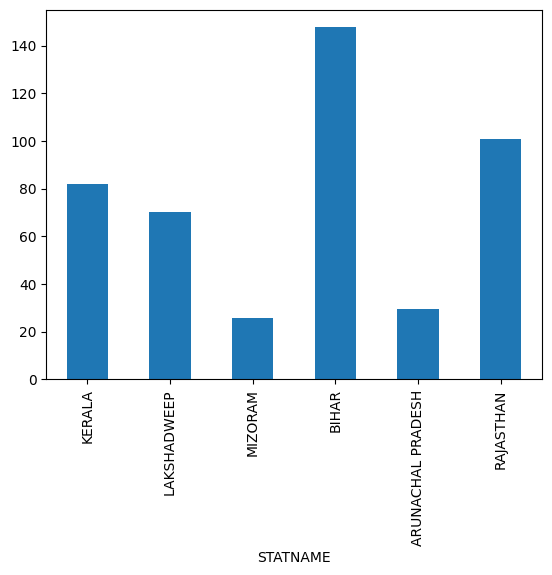

In [59]:
top_bottom['KIDSPERCL'].plot(kind= 'bar')

In [60]:
elem = data.copy(deep = True)
elem['SCHKIDS'] = elem.TOT_6_10_15 + elem.TOT_11_13_15
elem['KIDSPERCL'] = elem['SCHKIDS']/elem['TOTCLS1G']
elem.sort_values(by = 'OVERALL_LI',ascending = False,inplace = True)

<Axes: xlabel='STATNAME'>

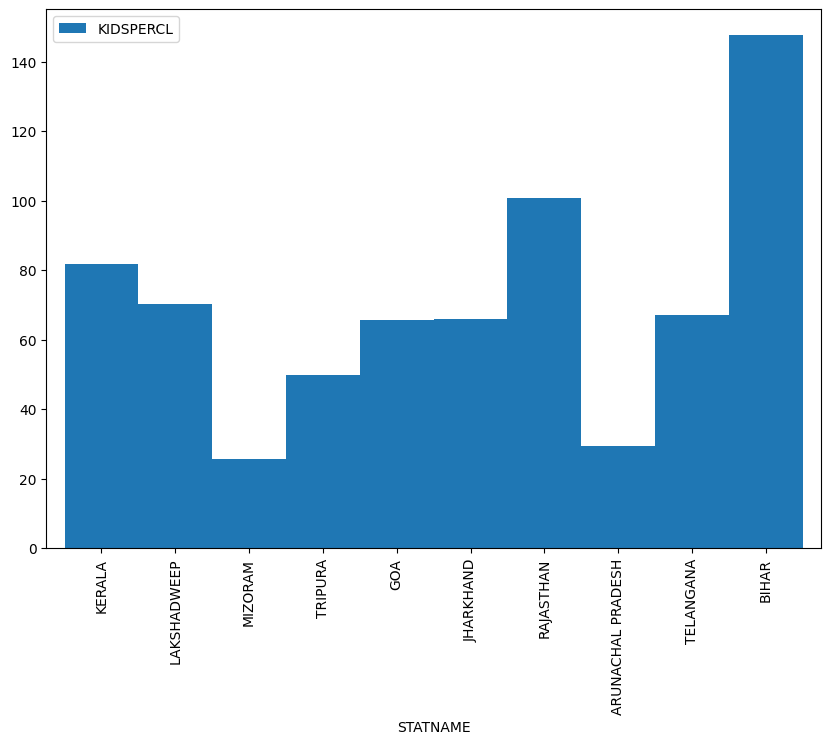

In [61]:
pd.concat([elem.head(5),elem.tail(5)], axis = 0, sort = False).plot(kind= 'bar', y = 'KIDSPERCL', figsize = (10,7),width = 1)

In [62]:
elem[['KIDSPERCL','OVERALL_LI']].corr()

,KIDSPERCL,OVERALL_LI
KIDSPERCL,1.00000,0.16714
OVERALL_LI,0.16714,1.00000


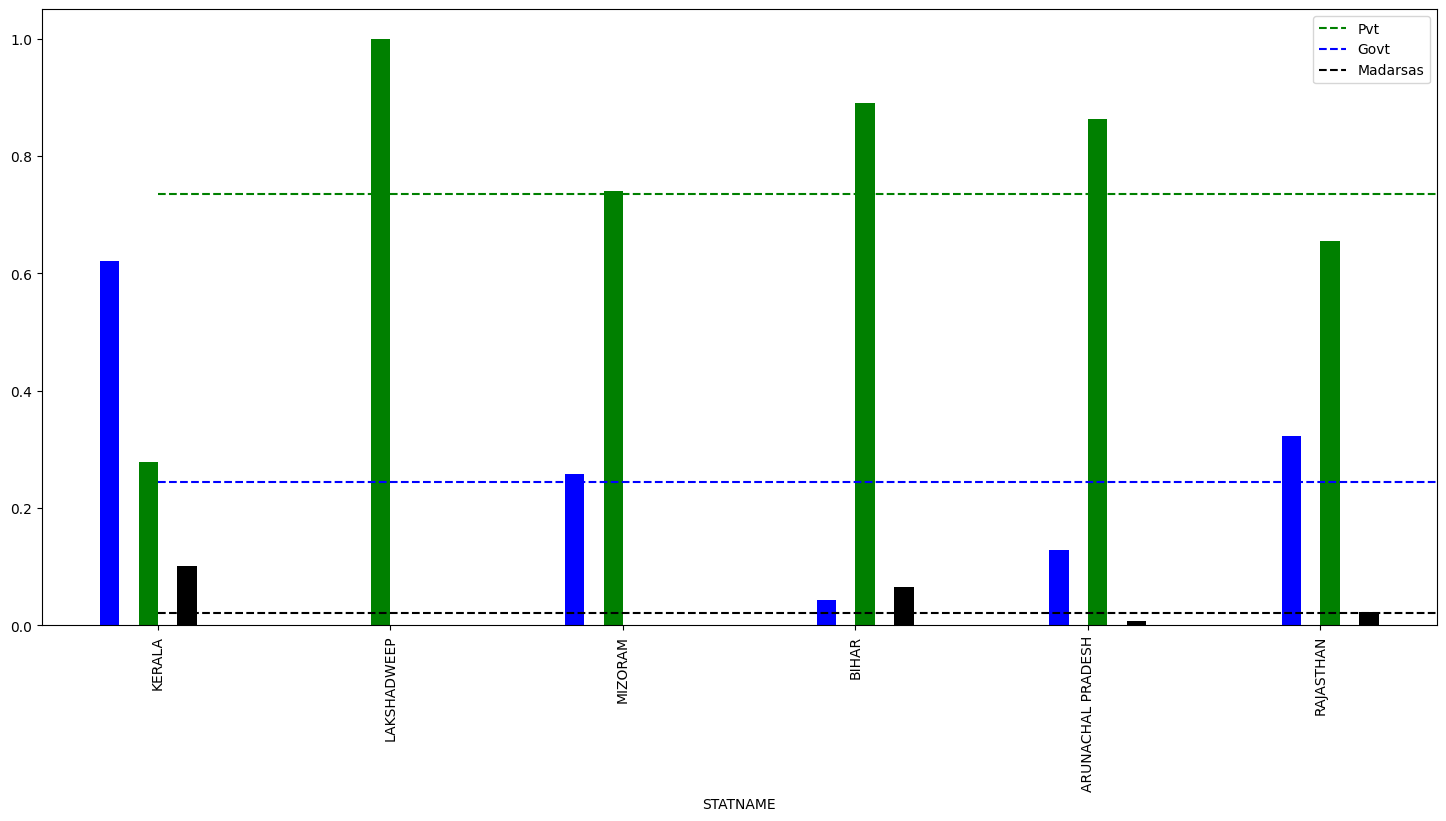

In [63]:
# Plot of the % of data private, govt schools and Madarsas and comparing them with the national avg.
schtotg_avg = (data.SCHTOTG/data.SCHTOT).mean()
schtotp_avg = (data.SCHTOTP/data.SCHTOT).mean()
schtotm_avg = (data.SCHTOTM/data.SCHTOT).mean()

top_3_elem['SCHTOTG_P'] = (top_3_elem.SCHTOTG/top_3_elem.SCHTOT)
top_3_elem['SCHTOTP_P'] = (top_3_elem.SCHTOTP/top_3_elem.SCHTOT)
top_3_elem['SCHTOTM_P'] = (top_3_elem.SCHTOTM/top_3_elem.SCHTOT)

bottom_3_elem['SCHTOTG_P'] = (bottom_3_elem.SCHTOTG/bottom_3_elem.SCHTOT)
bottom_3_elem['SCHTOTP_P'] = (bottom_3_elem.SCHTOTP/bottom_3_elem.SCHTOT)
bottom_3_elem['SCHTOTM_P'] = (bottom_3_elem.SCHTOTM/bottom_3_elem.SCHTOT)

pd.concat([top_3_elem, bottom_3_elem], axis = 1, sort = False).plot(y = ['SCHTOTP_P','SCHTOTG_P','SCHTOTM_P'],\
                                                                    figsize = (18,8), kind = 'bar',\
                                                                    color =['blue','blue','g','g','black','black'], \
                                                                       )

plt.plot([schtotg_avg]*8, linestyle ='--',color = 'g') # National avg for % of govt schools

plt.plot([schtotp_avg]*8, linestyle ='--',color = 'blue') # National avg for % of private schools

plt.plot([schtotm_avg]*8, linestyle ='--',color= 'black') # National avg for % of Madarsas

plt.legend(['Pvt','Govt','Madarsas'],loc = 1)

In [64]:
display_desc('CONTIE')

'Grants: School Development - Expended'

In [65]:
elem[['CONTIE','OVERALL_LI']].corr()

,CONTIE,OVERALL_LI
CONTIE,1.000000,-0.481281
OVERALL_LI,-0.481281,1.000000


<Axes: xlabel='STATNAME'>

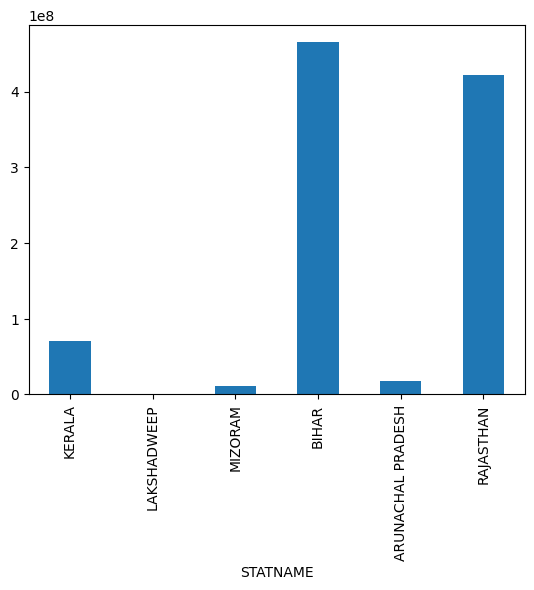

In [66]:
top_bottom.CONTIE.plot(kind = 'bar')

In [67]:
display_desc('C9_B')

'Enrolment By Grade: Boys - Grade 9'

In [68]:
display_desc('C9_G')

'Enrolment By Grade: Girls - Grade 9'

In [69]:
display_desc('C8_B')

'Enrolment By Grade: Boys - Grade 8'

In [70]:
display_desc('C8_G')

'Enrolment By Grade: Girls - Grade 8'

In [71]:
data['C9_TOTAL'] = data.loc[:,'C9_B'] + data.loc[:,'C9_G']

In [72]:
data['C8_TOTAL'] = data.loc[:,'C8_B'] + data.loc[:,'C8_G']

In [73]:
data['DROP_8_9'] = (data.C8_TOTAL - data.C9_TOTAL)/data.C8_TOTAL

In [74]:
top_bottom_drop = pd.concat([data.sort_values('OVERALL_LI').tail(3).DROP_8_9,
                             data.sort_values('OVERALL_LI').head(3).DROP_8_9], axis = 0)

In [75]:
top_bottom_drop

STATNAME
MIZORAM             -0.025558
LAKSHADWEEP         -0.292279
KERALA              -0.038128
BIHAR                0.216246
TELANGANA            0.038714
ARUNACHAL PRADESH    0.102825
Name: DROP_8_9, dtype: float64

<Axes: xlabel='STATNAME'>

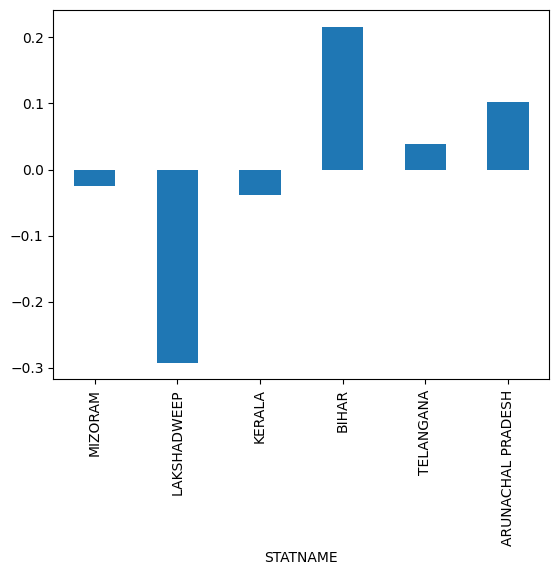

In [76]:
top_bottom_drop.plot(kind='bar', y = 'DROP_8_9', x = 'STATNAME')

In [77]:
data[['DROP_8_9','OVERALL_LI']].corr()

,DROP_8_9,OVERALL_LI
DROP_8_9,1.000000,-0.703246
OVERALL_LI,-0.703246,1.000000


In [78]:
data.set_index('STATNAME', inplace = True)

In [79]:
class_b_columns = data.columns[data.columns.str.contains('C\d_[B]$',case = False, regex = True)].tolist()
class_g_columns = data.columns[data.columns.str.contains('C\d_[G]$',case = False, regex = True)].tolist()

In [80]:
sums_classes_df = pd.DataFrame(np.matrix(data[class_b_columns]) + np.matrix(data[class_g_columns]))

In [81]:
sums_classes_cols=[i[:2] for i in class_b_columns]
sums_classes_index = data.index

In [82]:
sums_classes_df.columns = sums_classes_cols

In [83]:
totals = sums_classes_df.sum(axis = 0)

In [84]:
dropout = []
for i,_ in enumerate(totals):
    try:
        dropout.append((totals[i] - totals[i+1])/totals[i])
    except:
        pass

In [85]:
dropout

[0.049807894807547,
 0.014726304017832778,
 -0.008486844753752712,
 0.023597734638681263,
 0.08056395873036064,
 0.019658139068640237,
 0.026063321302817914,
 0.06841362994279623]

<BarContainer object of 8 artists>

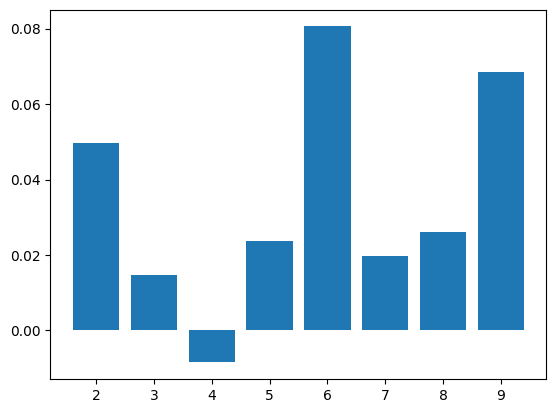

In [86]:
plt.bar(x = range(2,10,1),height = dropout)

In [87]:
import statsmodels.api as sm
import pylab

<ipython-input-88-48a118d51c0b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['OVERALL_LI'],hist=True,kde=True,ax=a[0])


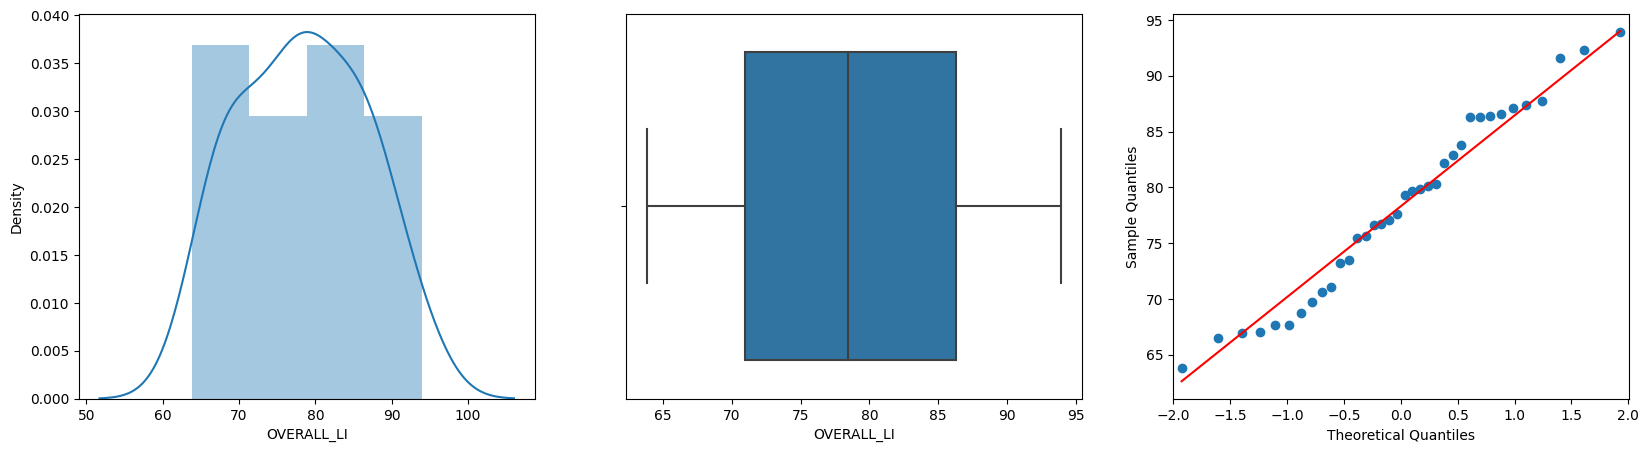

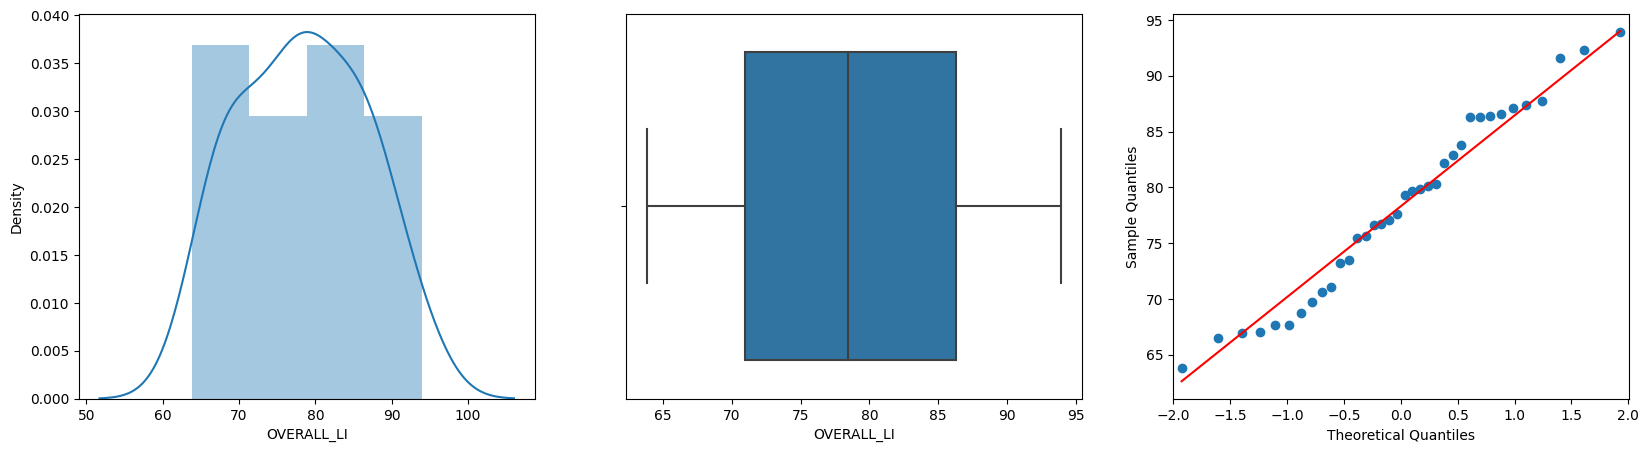

In [88]:
fig,a=plt.subplots(1,3,figsize=(20,5))
sns.distplot(data['OVERALL_LI'],hist=True,kde=True,ax=a[0])
sns.boxplot(x=data['OVERALL_LI'],ax=a[1])
sm.qqplot(data['OVERALL_LI'],line='s',ax=a[2])

In [89]:
from scipy.stats import shapiro
stats,p=shapiro(data['OVERALL_LI'])
print("Stats = %.3f, p=%.3f"%(stats,p))

Stats = 0.963, p=0.270


In [90]:
from scipy import stats
t_value,p_value=stats.ttest_ind(data['OVERALL_LI'],data['GROWTHRATE'])
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p_value is %f'%p_value)
alpha=0.05
if p_value<=alpha:
  print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'We reject the null hypothesis H0. ')
else:
  print('We do not reject the null hypothesis H0. ')

Test statistic is 24.778123
p_value is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. 


In [91]:
corr,_=stats.pearsonr(data['OVERALL_LI'],data['GROWTHRATE'])
print("Pearsons corr %.3f"%corr)

Pearsons corr 0.041
